In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer



import warnings
warnings.simplefilter("ignore")

In [2]:
#reading thecsv file
df=pd.read_csv("D:\ExcelR Data Science\Assignments\PCA\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [7]:
x=df.drop('Type',axis=1)
y=df['Type']

In [8]:
sd=StandardScaler()
x=sd.fit_transform(x)

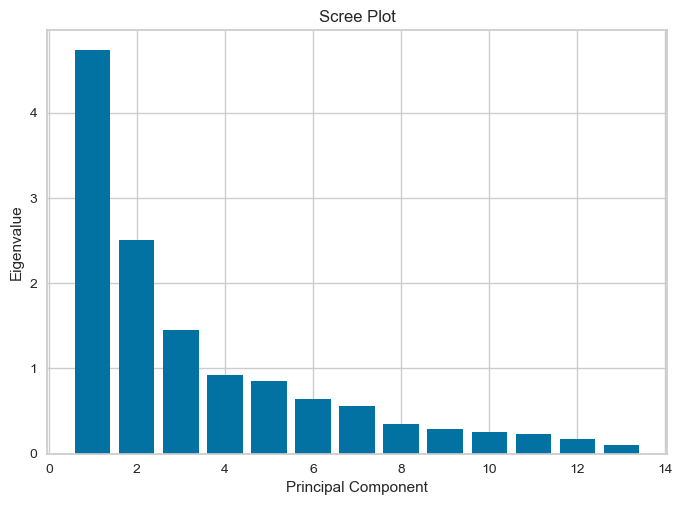

In [9]:
# fit a PCA model to the data
pca = PCA()
pca.fit(x)

# get the eigenvalues of the principal components
eigenvalues = pca.explained_variance_

# plot the scree plot
plt.bar(range(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

##### From above plot we can take 6 or 7 as optimal number for pCA Components

In [10]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### Getting the optimal components using the cumulative Variacne with scree plot

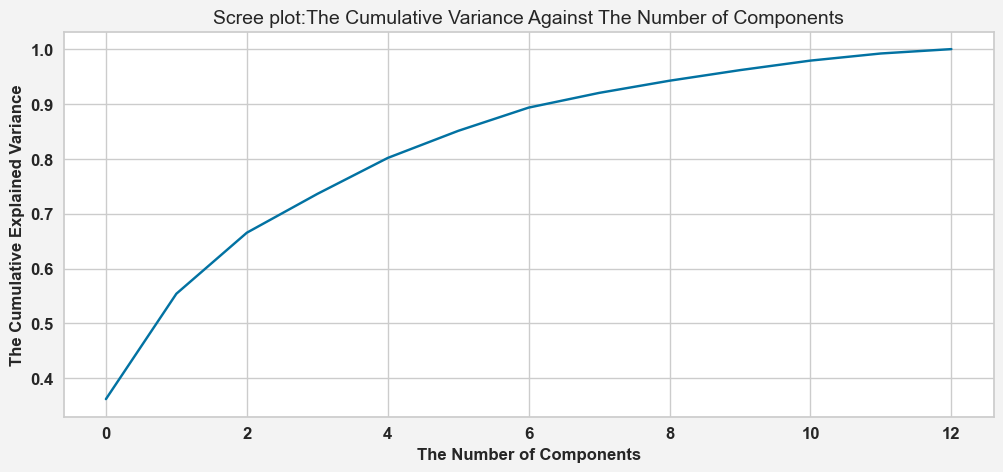

In [11]:
fig = plt.figure(figsize = (12,5))
fig.set_facecolor("#F3F3F3")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree plot:The Cumulative Variance Against The Number of Components', fontsize=14)
plt.xlabel('The Number of Components', fontsize=12, fontweight='bold')
plt.ylabel('The Cumulative Explained Variance', fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [12]:
pca = PCA(n_components = 6)
pca.fit(x)
x_pca = pca.transform(x)
 
x_pca.shape

(178, 6)

In [13]:
print("Before PCA:",x.shape)
print("After PCA:",x_pca.shape)

Before PCA: (178, 13)
After PCA: (178, 6)


In [14]:
# Creatinf DataFrame after PCA 
pca_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [15]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520


In [16]:
#parsing the target columns to PCA DATAFRAME
pca_df['Type']=df['Type']

In [17]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,1


In [18]:
pca_df.shape

(178, 7)

In [19]:
pca_df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

### Cluster Models

In [21]:
pca_c=pca_df.drop('Type',axis=1)

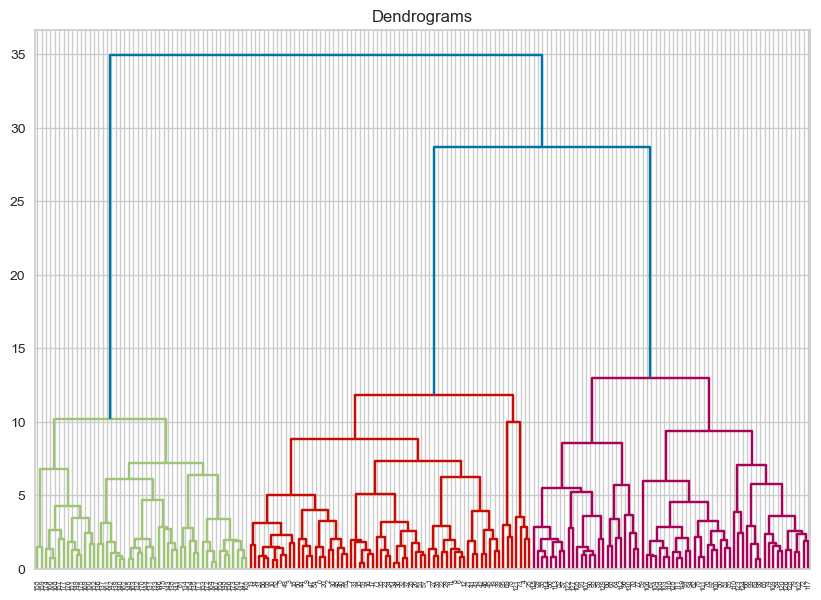

In [22]:
#  Hieracharcal clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_c, method='ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(pca_c)
labels=cluster.labels_

In [ ]:
#labels=labels+1

In [24]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [25]:
# assigning the clusters into datafrem
pca_df['Cluster_label']=pd.array(labels)

In [26]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,Type,Cluster_label
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,1,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,1,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,1,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,1,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,1,2
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,3,1
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,3,1
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,3,1
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,3,1


In [27]:
print("type",pca_df['Type'].unique())
print("cluster",pca_df['Cluster_label'].unique())


type [1 2 3]
cluster <IntegerArray>
[2, 0, 1]
Length: 3, dtype: Int64


In [29]:
# Evaluating accuary with Taget values with clusters

In [28]:
from sklearn.metrics import adjusted_rand_score

# Assuming you have the target variable y_true and the cluster labels y_pred
adjusted_rand_index = adjusted_rand_score(pca_df['Type'], pca_df['Cluster_label'])
print("Adjusted Rand index:", adjusted_rand_index)

Adjusted Rand index: 0.8472798762173084


In [30]:
from sklearn.metrics import normalized_mutual_info_score

# Assuming you have the target variable y_true and the cluster labels y_pred
normalized_mutual_info = normalized_mutual_info_score(pca_df['Type'], pca_df['Cluster_label'])
print("Normalized Mutual Information:", normalized_mutual_info)

Normalized Mutual Information: 0.8248286514536504


##### We can see that 84% of data points are clustered correctly using Hieracharcal Clustering

In [31]:
#KMEANS CLUSTERING
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(pca_c)

In [33]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
#assigning the kmeans clusters to dataframe
pca_df['Kmeans_Cluster']=pd.array(clusters)

In [35]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,Type,Cluster_label,Kmeans_Cluster
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,1,2,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,1,2,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,1,2,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,1,2,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,1,2,0
...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,3,1,2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,3,1,2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,3,1,2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,3,1,2


In [36]:
print("type",pca_df['Type'].unique())
print("cluster",pca_df['Kmeans_Cluster'].unique())

type [1 2 3]
cluster <IntegerArray>
[0, 1, 2]
Length: 3, dtype: Int32


In [37]:
from sklearn.metrics import adjusted_rand_score

# Assuming you have the target variable y_true and the cluster labels y_pred
adjusted_rand_index = adjusted_rand_score(pca_df['Type'], pca_df['Kmeans_Cluster'])
print("Adjusted Rand index:", adjusted_rand_index)

Adjusted Rand index: 0.8974949815093207


In [38]:
from sklearn.metrics import normalized_mutual_info_score

# Assuming you have the target variable y_true and the cluster labels y_pred
normalized_mutual_info = normalized_mutual_info_score(pca_df['Type'], pca_df['Kmeans_Cluster'])
print("Normalized Mutual Information:", normalized_mutual_info)

Normalized Mutual Information: 0.8758935341223069


#####  We can see that 89% of data points are clustered correctly using Kmeans Clustering

In [39]:
# Defining target valiable
pca_x=pca_df.drop(["Type","Cluster_label","Kmeans_Cluster"],axis=1)


In [40]:
pca_y=pca_df['Type']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
#Spliting train and test data
x_train,x_test,y_train,y_test=train_test_split(pca_x,pca_y,test_size=0.25,random_state=42)

#### Comparing with classification models

In [43]:


lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print("ClassificationReport:\n",classification_report(lr_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(lr_pred,y_test))
print("Accuracy:","{:.2f}%".format(accuracy_score(lr_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.94      1.00      0.97        17
           3       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

ConfusionMatrix:
 [[15  0  0]
 [ 0 17  0]
 [ 0  1 12]]
Accuracy: 0.98%


In [44]:
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
ds_pred=ds.predict(x_test)

print('Classification Report:\n',classification_report(y_test,ds_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ds_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(ds_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
 [[14  1  0]
 [ 1 17  0]
 [ 0  0 12]]
Accuracy: 0.96%


In [45]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print('Classification Report:\n',classification_report(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(rf_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      0.94      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
 [[14  1  0]
 [ 0 17  1]
 [ 0  0 12]]
Accuracy: 0.96%


In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

print('Classification Report:\n',classification_report(y_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,knn_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(knn_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]
Accuracy: 0.98%


In [47]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)

#Evaluation
print("ClassificationReport:\n",classification_report(gnb_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(gnb_pred,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(gnb_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

ConfusionMatrix:
 [[14  0  0]
 [ 1 18  0]
 [ 0  0 12]]
Accuracy:
 0.98%


In [48]:
model=['Logistic','NaiveBayes','DecisiionTree','RandomForest','KNNClassifier']
accuracy=[accuracy_score(y_test,lr_pred),accuracy_score(gnb_pred,y_test),accuracy_score(y_test,ds_pred),
          accuracy_score(y_test,rf_pred),accuracy_score(y_test,knn_pred)]
acc=pd.DataFrame({'MLModel':model,
                 'Accuracy':accuracy})

In [49]:
acc.sort_values('Accuracy',ascending=False)

,MLModel,Accuracy
0,Logistic,0.977778
1,NaiveBayes,0.977778
4,KNNClassifier,0.977778
2,DecisiionTree,0.955556
3,RandomForest,0.955556


In [50]:
#We can see Naive Bayes and RandomForest,Logistice classification models gives the 97% Accuarcy